# CNNでMNISTを学習

Train on 60000 samples, validate on 10500 samples
Epoch 1/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.2189 - acc: 0.9330 - val_loss: 0.0562 - val_acc: 0.9838
Epoch 2/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0822 - acc: 0.9750 - val_loss: 0.0403 - val_acc: 0.9898
Epoch 3/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0633 - acc: 0.9816 - val_loss: 0.0364 - val_acc: 0.9898
Epoch 4/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0571 - acc: 0.9832 - val_loss: 0.0269 - val_acc: 0.9931
Epoch 5/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0557 - acc: 0.9835 - val_loss: 0.0254 - val_acc: 0.9929
Epoch 6/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0552 - acc: 0.9843 - val_loss: 0.0262 - val_acc: 0.9935
Epoch 7/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0558 - acc: 0.9841 - val_loss: 0.0339 - val_ac

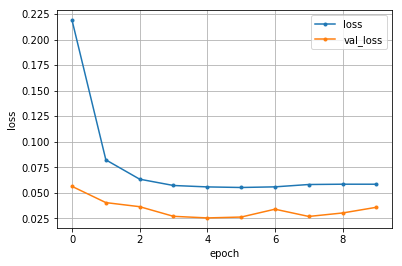

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.175)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))# 32個の３＊３サイズのフィルターを作る
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# 28 x 28の画像がgrayscaleで1chなので、28, 28, 1にreshapeする
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# 0-255の整数値を0〜1の小数に変換する
# MNISTって必ずこの処理入るけれど、意味あるのかな
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

# one-hot vector形式に変換する
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_valid, y_valid))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
loss     = history.history['loss']
val_loss = history.history['val_loss']
nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# CNNでCIFAR10を学習

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.175)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# 28 x 28の画像がgrayscaleで1chなので、28, 28, 1にreshapeする
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_valid = x_valid.reshape(x_valid.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

# 0-255の整数値を0〜1の小数に変換する
# MNISTって必ずこの処理入るけれど、意味あるのかな
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

# one-hot vector形式に変換する
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_valid, y_valid))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
loss     = history.history['loss']
val_loss = history.history['val_loss']
nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 8750 samples
Epoch 1/20
50000/50000 [==============================] - 111s 2ms/step - loss: 1.7497 - acc: 0.3738 - val_loss: 1.2905 - val_acc: 0.5493
Epoch 2/20
50000/50000 [==============================] - 108s 2ms/step - loss: 1.3577 - acc: 0.5214 - val_loss: 1.1501 - val_acc: 0.6120
Epoch 3/20
50000/50000 [==============================] - 103s 2ms/step - loss: 1.2033 - acc: 0.5756 - val_loss: 1.0851 - val_acc: 0.6297
Epoch 4/20
50000/50000 [==============================] - 102s 2ms/step - loss: 1.1056 - acc: 0.6145 - val_loss: 0.9700 - val_acc: 0.6663
Epoch 5/20
50000/50000 [==============================] - 102s 2ms/step - loss: 1.0360 - acc: 0.6385 - val_loss: 0.8007 - val_acc: 0.7161
Epoch 6/20
50000/50000 [==